In [2]:
import wbgapi as wb
import warnings
import time

import pandas as pd
from pandas import DataFrame
import numpy as np
from numpy import quantile, where
import scipy.stats as stats
import statsmodels as sm
import statsmodels.api
import statsmodels
import pytz
import matplotlib.pyplot as plt
import matplotlib.font_manager
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

warnings.filterwarnings('ignore')

from scipy.stats import shapiro
from scipy.stats import kstest
from scipy.stats import normaltest
from scipy.stats import chisquare
from scipy.stats import jarque_bera
from scipy.stats import cramervonmises
from statsmodels.stats.diagnostic import lilliefors 
import statsmodels.api as sm
from scipy.stats import norm
from scipy.stats import kurtosistest
from scipy.stats import anderson

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import QuantileTransformer

<h1 style="color:black; background-color:white; padding:10px; padding-bottom:10px;text-align: center;">Data transformation techniques</h1>

<h2 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">I. Introduction</h2>
<p style="color:black; background-color:white; padding:5px; padding-bottom:20px;margin-bottom:-10px">
Economics as a science of scarcity, places the necessity of studying the economic system in the direction of increasing its efficiency. More and more models close to "reality" are being created that make it possible to understand and predict economic dynamics in order to create effective and responsive economic and social public policies. An important factor in this direction is that all steps from the correct measurement of economic phenomena, to the correct collection of the data, cleaning and preparation of the data are optimal. Only then the models that step on this data will be correct and give the right answers.
<p style="color:black; background-color:white; padding:5px;padding-bottom:20px;margin-bottom:-10px">The present study presents the different methods and techniques for analyzing one of the basic steps before running the models - the detection of outliers and anomalies. The theory of "end values", their types, the factors behind their occurrence and the meaning behind each "end value" will be briefly presented.</p>
<p style="color:black; background-color:white; padding:5px;padding-bottom:20px;margin-bottom:-10px">The purpose of the study is not to show which of these "end values" are bad, wrong or unnecessary, but rather to show different approaches to distinguishing them, which will provide the necessary information for the next step in dealing with them.</p>
<p style="color:black; background-color:white; padding:5px;">As an example of analysis, the database of the World Bank will be used, and specifically indicators for the level of employment and unemployment.</p>

<h2 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">II. Theoretical foundations of missing data.</h2>
<p style="color:black; background-color:white; padding:5px; margin-bottom:-15px">Let's briefly introduce what outliers and anomalies are in data, how they are related, and how they differ.</p>
<ul style="color:black; background-color:white; padding:5px; margin-bottom:-10px">An outlier is an observation that is unlike the other observations. It is rare, or distinct, or does not fit in some way. Outliers are data points which lie at an abnormal distance from other points in a random sample from a population. In statistics, an outlier is a data point that differs significantly from other observations.</ul>
<li style="color:black; background-color:white; padding:5px"><i>We will generally define outliers as samples that are exceptionally far from the mainstream of the data.</i> — Page 33, Applied Predictive Modeling, 2013.</li>
<li style="color:black; background-color:white; padding:5px"><i>An outlier is an observation that lies outside the overall pattern of a distribution</i> — (Moore and McCabe 1999)</li>
<p style="color:black; background-color:white; padding:5px; padding-bottom:20px; margin-bottom:-15px">Anomalies are referred to values, which do not conform to an expected pattern of the other values in the data set. Anomalies are referred to as a different distribution that occurs within a distribution. In other words, if outliers we can understand them as extreme values, usually single, rare, apparently different caused by multiple factors from errors in collecting part of the data to sharp external influences that distort the values. In contrast, anomalies are rather different values that follow their own behavior, in most cases a few, which is not so much extreme as different in logic from the rest of the values. Reasons that can cause anomalies are the influence of factors at a certain moment that change the behavior of the values. Anomalies are patterns of different data within given data, whereas Outliers would be merely extreme data points within data. If not aggregated appropriately, anomalies may be neglected as outliers. Despite this general definition of outliers and anomalies, in many cases these terms are used interchangeably and the difference between them depending on the case may be difficult to detect. But still revealing the behavior in the final values - random or logical is important when working with them.</p>
<p style="color:black; background-color:white; padding:5px;padding-bottom:20px;margin-bottom:-10px">1. Outliers are divided according to several characteristics. Depending on the number, we distinguish:</p>
<li style="color:black; background-color:white; padding:5px">A univariate outlier is a data point that consists of an extreme value on one variable. </li>
<li style="color:black; background-color:white; padding:5px">A multivariate outlier is a combination of unusual scores on at least two variables. </li>
<p style="color:black; background-color:white; padding:5px;padding-bottom:20px;margin-bottom:-10px">2. Depending on their number and behavior, we distinguish the following three types of outliers:</p>
<li style="color:black; background-color:white; padding:5px">Point outlier: If an individual data point can be considered as anomalous with respect to the rest of the data, then the instance is termed as a point outlier.</li>
<li style="color:black; background-color:white; padding:5px">Contextual outliers: If a data instance is anomalous in a specific context (but not otherwise), then it is termed as a contextual outlier. Attributes of data objects should be divided into two groups :
(Contextual attributes: defines the context, e.g., time & location)
(Behavioural attributes: characteristics of the object, used in outlier evaluation, e.g., temperatur) </li>
<li style="color:black; background-color:white; padding:5px">Collective outliers: If a collection of data points is anomalous concerning the entire data set, it is termed as a collective outlier. </li>
<p style="color:black; background-color:white; padding:5px;padding-bottom:20px;margin-bottom:-10px">3. According to whether we analyze current and future data, we can distinguish the following approaches:</p>
<li style="color:black; background-color:white; padding:5px">outlier detection: The training data contains outliers which are defined as observations that are far from the others. Outlier detection estimators thus try to fit the regions where the training data is the most concentrated, ignoring the deviant observations.</li>
<li style="color:black; background-color:white; padding:5px">novelty detection: The training data is not polluted by outliers and we are interested in detecting whether a new observation is an outlier. In this context an outlier is also called a novelty.</li>
<p style="color:black; background-color:white; padding:5px;padding-bottom:20px;margin-bottom:-10px">Outlier detection and novelty detection are both used for anomaly detection, where one is interested in detecting abnormal or unusual observations. Outlier detection is then also known as unsupervised anomaly detection and novelty detection as semi-supervised anomaly detection.</p>
<p style="color:black; background-color:white; padding:5px;padding-bottom:20px;margin-bottom:-10px">4. Depending on the reasons for the occurrence of outliers, we can designate the most common ones as:</p>
<li style="color:black; background-color:white; padding:5px">Errors in measuring or collecting the data </li>
<li style="color:black; background-color:white; padding:5px">Errors in data extraction, processing or manipulation</li>
<li style="color:black; background-color:white; padding:5px">Human error when entering, loading the data.</li>
<li style="color:black; background-color:white; padding:5px">Natural occurrences of outliers that aren’t errors, which can be called dataset novelties.</li>
<p style="color:black; background-color:white; padding:5px;padding-bottom:20px;margin-bottom:-10px">5. The importance of detecting outliers and anomalies is enormous. Not only the improvement of the data from the point of view of applying subsequent models but also as a red light in many cases. As examples of the importance of detecting outliers and anomalies we can mention:</p>
<li style="color:black; background-color:white; padding:5px">Medicine: An anomalous values in blood or other indicators may indicate the presence of a malignant tumor, or other hidden illnes;</li>
<li style="color:black; background-color:white; padding:5px">Cyberattacks: Outlieres may indicate security breaches;</li>
<li style="color:black; background-color:white; padding:5px">Fraud detection: An outlier credit card transaction or an abnormal buying pattern can indicate a credit card theft or an identity theft;</li>

<h2 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">III. Methodology and empirical analysis </h2>
<p style="color:black; background-color:white; padding:5px;padding-bottom:20px;margin-bottom:-10px">The methodology of the present study is based on the study of economic data related to the labor market. The aim of the research is to reveal the different techniques for data normalization of economic data. The data parameters are as follows:</p>
<li style="color:black; background-color:white; padding:5px">Database used: World Bank ( https://data.worldbank.org/ ) </li>
<li style="color:black; background-color:white; padding:5px">Indicators used: GDP per capita is gross domestic product divided by midyear population. GDP is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products.  (https://data.worldbank.org/indicator/NY.GDP.PCAP.CD)</li>
<li style="color:black; background-color:white; padding:5px">Year of analysis: 2022</li>
<li style="color:black; background-color:white; padding:5px">Scope of analysis: countries worldwide (WLD)</li>

<p style="color:black; background-color:white; padding:5px;padding-bottom:20px;margin-bottom:-10px">The methodology includes the following two main steps:</p>
<li style="color:black; background-color:white; padding:5px">Preprocessing: preparing the data for analysis including loading the data, familiarizing the data and removing missing data. </li>
<li style="color:black; background-color:white; padding:5px">Normal distribution analysis: using different tests to confirm the normal distribution of data and using different algorithms for normalization and standardization of data.</li>

<h3 style="color:black; background-color:white; padding:5px; margin-bottom:-15px">Step one. Preprocessing</h3>
<ul style="color:black; background-color:white; padding:5px; margin-bottom:-10px"> In this first step, the database will be prepared using the following sub-steps:</ul>
<li style="color:black; background-color:white; padding:5px">Data from the World Bank database will be loaded;</li>
<li style="color:black; background-color:white; padding:5px">The key features of the data will be revealed;</li>
<li style="color:black; background-color:white; padding:5px">Missing data will be removed</li>
<li style="color:black; background-color:white; padding:5px">The data will be visualized</li>

<h4 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">Load the data</h4>
<p style="color:black; background-color:white; padding:5px;">
A function is created to load the data from the World Bank database according to selected parameters: employment and unemployment indicators with a worldwide scope.</p>

In [3]:
def load_and_name_db_WB (db, *args):
    global df_name
    df_name = db
    globals()[df_name] = wb.data.DataFrame(indicators, wb.region.members(region), range(start_period, end_period))
    globals()[df_name].columns = (new_column_names)
    globals()[df_name] = globals()[df_name].round(2) 
    return globals()[df_name]

In [4]:
name_db = "gdp_percap_world"
indicators = ['NY.GDP.PCAP.CD']
new_column_names = ['GDP per capita']
region = "WLD"
start_period = 2021
end_period = 2022

load_and_name_db_WB(name_db, indicators, region, start_period, end_period)

,GDP per capita
economy,
ABW,29342.10
AFG,368.75
AGO,1953.53
ALB,6492.87
AND,42137.33
...,...
XKX,5269.78
YEM,NaN
ZAF,7055.04


<h4 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-5px">Missing values</h4>
<p style="color:black; background-color:white; padding:5px;">
In this substep, all missing values are removed.</p>

In [5]:
gdp_no_missing = gdp_percap_world.dropna()
gdp_no_missing

,GDP per capita
economy,
ABW,29342.10
AFG,368.75
AGO,1953.53
ALB,6492.87
AND,42137.33
...,...
WSM,3857.32
XKX,5269.78
ZAF,7055.04


<h4 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-5px">Missing values</h4>
<p style="color:black; background-color:white; padding:5px;">
In this substep, all missing values are removed.</p>

In [6]:
statsmodels.stats.descriptivestats.describe(gdp_no_missing).round(2)

,GDP per capita
nobs,197.00
missing,0.00
mean,18152.08
std_err,1995.72
upper_ci,22063.62
lower_ci,14240.54
std,28011.26
iqr,18690.24
iqr_normal,13855.10
mad,18297.85


In [53]:
print(f"The country with highest GDP per capita is:  {gdp_no_missing.stack().idxmax()[0]}, with value of: {gdp_no_missing.stack().max()} current US$.")
print(f"The country with lowest GDP per capita is:  {gdp_no_missing.stack().idxmin()[0]}, with value of: {gdp_no_missing.stack().min()} current US$.")

The country with highest GDP per capita is:  MCO, with value of: 234315.46 current US$.
The country with lowest GDP per capita is:  BDI, with value of: 221.48 current US$.


<h4 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-5px">Visualization</h4>
<p style="color:black; background-color:white; padding:5px;">
In this substep, we use a scatterplot to visualize the data for the two indicators.</p>

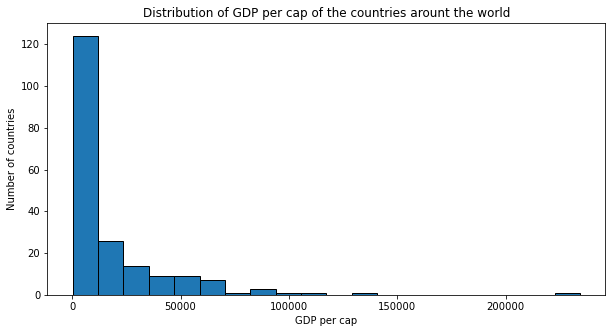

In [7]:
fig = plt.figure(figsize =(10, 5))
plt.hist(gdp_no_missing, edgecolor='black', bins=20)
plt.xlabel("GDP per cap")
plt.ylabel("Number of countries")
plt.title("Distribution of GDP per cap of the countries arount the world")
plt.show()

<p style="color:black; background-color:white; padding:5px;">Looking at the graph and the descriptive statistics above, we can see that there are serious differences between the countries according to the studied indicator. From a low of $221.48 to a high of $234,315.46. Also, the variance and standard deviation of these values also tell about the distribution of the data.</p> 

---

<h3 style="color:black; background-color:white; padding:5px; margin-bottom:-15px">1. Feature scaling</h3>
<ul style="color:black; background-color:white; padding:5px; margin-bottom:-10px">In this section, we will examine data for a normal distribution (Gaussian distribution) and then test different scaling models.</ul>
<li style="color:black; background-color:white; padding:5px">Testing for Gaussian distribution;</li>
<li style="color:black; background-color:white; padding:5px">Visualizing for Gaussian distribution;</li>
<li style="color:black; background-color:white; padding:5px">Test major scaling algorithms;</li>
<li style="color:black; background-color:white; padding:5px">Visualize the results of scaling algorithms;</li>

<h4 style="color:black; background-color:white; padding:5px; margin-bottom:-15px">1.1 Testing for Gaussian distribution</h4>
<ul style="color:black; background-color:white; padding:5px; margin-bottom:-10px">The following tests for a normal, Gaussian distribution will be used in this subsection:</ul>
<li style="color:black; background-color:white; padding:5px">Shapiro-Wilk Test;</li>
<li style="color:black; background-color:white; padding:5px">D’Agostino’s K-squared test;</li>
<li style="color:black; background-color:white; padding:5px">Chi-Square Normality Test;</li>
<li style="color:black; background-color:white; padding:5px">Lilliefors Test for Normality;</li>
<li style="color:black; background-color:white; padding:5px">Jarque–Bera test for Normality;</li>
<li style="color:black; background-color:white; padding:5px">Kolmogorov-Smirnov test for Normality;</li>

In [100]:
def normality_tests(df):
    tests = {}

    models = [
        [shapiro,"Shapiro-Wilk Test"],
        [normaltest, "D’Agostino’s K-squared test"],
        [chisquare, "Chi-Square Normality Test"],
        [lilliefors, "Lilliefors Test for Normality"],
        [jarque_bera, "Jarque–Bera test for Normality"],
        [kstest, "Kolmogorov-Smirnov test for Normality"],
        [cramervonmises, "Cramér-von Mises test"],
        [kurtosistest, "Anscombe–Glynn test for Normality"]
    ]
    for i in models:
        if i[0] != kstest and i[0] != cramervonmises:
            stats, pvalue = i[0](df)
            tests[i[1]] = []
            tests[i[1]].append(stats)
            tests[i[1]].append(pvalue)
            if pvalue < 0.05:
                tests[i[1]].append("Probably not normal distribution")
            else:
                tests[i[1]].append("Probably normal distribution")
                
        elif i[0] == kstest:
            stats, pvalue = kstest(df, 'norm')
            tests[i[1]] = []
            tests[i[1]].append(stats)
            tests[i[1]].append(pvalue)
            if pvalue < 0.05:
                tests[i[1]].append("Probably not normal distribution")
            else:
                tests[i[1]].append("Probably normal distribution")
        
        elif i[0] ==  cramervonmises:
            cramer = cramervonmises(df.values.flatten(), 'norm')
            tests[i[1]] = []
            tests[i[1]].append(cramer.statistic)
            tests[i[1]].append(cramer.pvalue)
            if cramer.pvalue < 0.05:
                tests[i[1]].append("Probably not normal distribution")
            else:
                tests[i[1]].append("Probably normal distribution")
                
    anderson_test = anderson(df.iloc[:, 0], "norm")
    if anderson_test[0] > anderson_test[1][2]:
        print(f"Anderson-Darling test results: The null hypotesis can be rejected at {anderson_test[2][2]} % significanse level.")
    else:
        print("Anderson-Darling test results: The null hypotesis cannot be rejected.")
    print("-"*70)
    
    df_results = pd.DataFrame(tests).T
    df_results = df_results.rename(columns={0: 'statistics', 1: 'p-value', 2: "status"})
    df_results["statistics"] = df_results["statistics"].astype(float).round(decimals = 3)
    df_results["p-value"] = df_results["p-value"].astype(float).round(decimals = 3)

    return df_results

In [101]:
normality_tests(gdp_no_missing)

Anderson-Darling test results: The null hypotesis can be rejected at 5.0 % significanse level.
----------------------------------------------------------------------


,statistics,p-value,status
Shapiro-Wilk Test,0.625,0.000,Probably not normal distribution
D’Agostino’s K-squared test,182.176,0.000,Probably not normal distribution
Chi-Square Normality Test,8472174.847,0.000,Probably not normal distribution
Lilliefors Test for Normality,0.261,0.001,Probably not normal distribution
Jarque–Bera test for Normality,3366.275,0.000,Probably not normal distribution
Kolmogorov-Smirnov test for Normality,1.000,0.000,Probably not normal distribution
Cramér-von Mises test,65.667,0.000,Probably not normal distribution
Anscombe–Glynn test for Normality,8.032,0.000,Probably not normal distribution


<p style="color:black; background-color:white; padding:5px;">All tests clearly confirm that the data distribution is not Gaussian. Let's visualize and see what the graphs will tell us.</p>

---

<h4 style="color:black; background-color:white; padding:5px; margin-bottom:-15px">1.2 Visualizing for Gaussian distribution</h4>
<ul style="color:black; background-color:white; padding:5px; margin-bottom:-10px">In this subsection, the following graphical analysis tools will be used to visualize the data distribution:</ul>
<li style="color:black; background-color:white; padding:5px">Q-Q plot, 45 line;</li>
<li style="color:black; background-color:white; padding:5px">Q-Q plot, standardized line;</li>
<li style="color:black; background-color:white; padding:5px">Kernel density estimate (KDE) plot;</li>
<li style="color:black; background-color:white; padding:5px">Probability plot;</li>
<li style="color:black; background-color:white; padding:5px">Distribution plot;</li>
<li style="color:black; background-color:white; padding:5px">Boxplot;</li>

In [56]:
def normality_visualization(df, column):
    figure, axes = plt.subplots(2, 3, figsize=(15,8))

    sm.qqplot(df[column], line='45', ax = axes[0, 0])
    axes[0, 0].set_title('Q-Q plot, 45 line')
    
    sm.qqplot(df.to_numpy().flatten(), line='s', ax = axes[0, 1])
    axes[0, 1].set_title('Q-Q plot, standardized line')
    
    sns.kdeplot(df[column],  ax = axes[0, 2])
    axes[0, 2].set_title('Kernel density estimate (KDE) plot')
    
    stats.probplot(df.to_numpy().flatten(), dist="norm", plot = axes[1, 0])
    
    sns.distplot(df[column], fit=norm, ax = axes[1, 1])
    axes[1, 1].set_title('Distribution plot')

    sns.boxplot(x=df[column].values, ax = axes[1, 2])
    axes[1, 2].set_title('Boxplot')

    figure.suptitle('Normality visualization plots', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

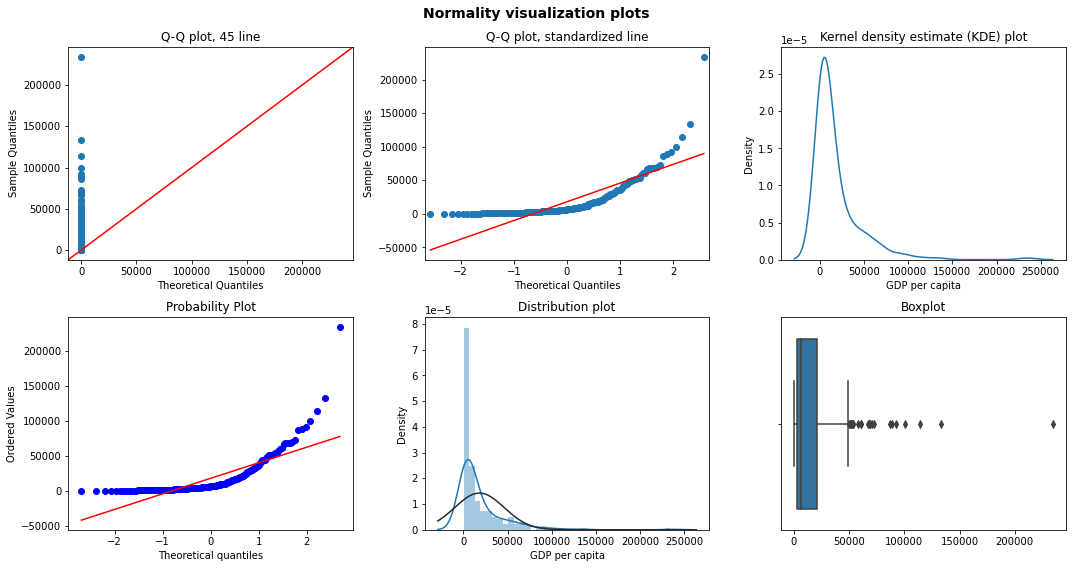

In [57]:
normality_visualization(gdp_no_missing, "GDP per capita" )

<p style="color:black; background-color:white; padding:5px;">The graphs clearly confirm the result of the above tests. The data distribution is not Gaussian.</p>

---

<h4 style="color:black; background-color:white; padding:5px; margin-bottom:-15px">1.3 Test major scaling algorithms;</h4>
<ul style="color:black; background-color:white; padding:5px; margin-bottom:-10px">In this subsection, the following algorithms for data normalization/standardization will be used. Their results will be displayed using the p - value of each of the Gaussian distribution tests used.</ul>
<li style="color:black; background-color:white; padding:5px">StandardScaler;</li>
<li style="color:black; background-color:white; padding:5px">MinMaxScaler;</li>
<li style="color:black; background-color:white; padding:5px">MaxAbsScaler;</li>
<li style="color:black; background-color:white; padding:5px">RobustScaler;</li>
<li style="color:black; background-color:white; padding:5px">PowerTransformer;</li>
<li style="color:black; background-color:white; padding:5px">QuantileTransformer;</li>

In [95]:
def pvalue_transformers (df):
    all_tests={}

    models = [
        [shapiro,"Shapiro-Wilk Test"],
        [normaltest, "D’Agostino’s K-squared test"],
        [chisquare, "Chi-Square Normality Test"],
        [lilliefors, "Lilliefors Test for Normality"],
        [jarque_bera, "Jarque–Bera test for Normality"],
        [kstest, "Kolmogorov-Smirnov test for Normality"],
        [cramervonmises, "Cramér-von Mises test"],
        [kurtosistest, "Anscombe–Glynn test for Normality"]

    ]
    for i in models:
        tests={}
        
        global df_standart
        scaler_standart = StandardScaler()
        df_standart = pd.DataFrame(scaler_standart.fit_transform(df.values), columns=df.columns, index=df.index)
        if i[0] == kstest:
            stats, pvalue = i[0](df_standart, "norm")
            if isinstance(pvalue,np.ndarray):
                tests["StandardScaler"] = pvalue[0]
            else:
                tests["StandardScaler"] = pvalue
        elif i[0] == cramervonmises:
            cramer = cramervonmises(df_standart.values.flatten(), 'norm')
            tests["StandardScaler"] = cramer.pvalue
            if isinstance(cramer.pvalue,np.ndarray):
                 tests["StandardScaler"] = cramer.pvalue[0]
            else:
                tests["StandardScaler"] = cramer.pvalue
        else:
            stats, pvalue = i[0](df_standart)
            if isinstance(pvalue,np.ndarray):
                tests["StandardScaler"] = pvalue[0]
            else:
                tests["StandardScaler"] = pvalue
        
        global df_normal
        scaler_normal = MinMaxScaler()
        df_normal = pd.DataFrame(scaler_normal.fit_transform(df.values), columns=df.columns, index=df.index)
        if i[0] == kstest:
            stats, pvalue = i[0](df_normal, "norm")
            if isinstance(pvalue,np.ndarray):
                tests["MinMaxScaler"] = pvalue[0]
            else:
                tests["MinMaxScaler"] = pvalue
        elif i[0] == cramervonmises:
            cramer = cramervonmises(df_normal.values.flatten(), 'norm')
            tests["MinMaxScaler"] = cramer.pvalue
            if isinstance(cramer.pvalue,np.ndarray):
                 tests["MinMaxScaler"] = cramer.pvalue[0]
            else:
                tests["MinMaxScaler"] = cramer.pvalue
        else:
            stats, pvalue = i[0](df_normal)
            if isinstance(pvalue,np.ndarray):
                tests["MinMaxScaler"] = pvalue[0]
            else:
                tests["MinMaxScaler"] = pvalue
        
        global df_maxabs
        maxabs = MaxAbsScaler()
        df_maxabs = pd.DataFrame(maxabs.fit_transform(df.values), columns=df.columns, index=df.index)
        if i[0] == kstest:
            stats, pvalue = i[0](df_maxabs, "norm")
            if isinstance(pvalue,np.ndarray):
                tests["MaxAbsScaler"] = pvalue[0]
            else:
                tests["MaxAbsScaler"] = pvalue
        elif i[0] == cramervonmises:
            cramer = cramervonmises(df_maxabs.values.flatten(), 'norm')
            tests["MaxAbsScaler"] = cramer.pvalue
            if isinstance(cramer.pvalue,np.ndarray):
                 tests["MaxAbsScaler"] = cramer.pvalue[0]
            else:
                tests["MaxAbsScaler"] = cramer.pvalue
        else:
            stats, pvalue = i[0](df_maxabs)
            if isinstance(pvalue,np.ndarray):
                tests["MaxAbsScaler"] = pvalue[0]
            else:
                tests["MaxAbsScaler"] = pvalue
            
        global df_robust
        transformer = RobustScaler()
        df_robust = pd.DataFrame(transformer.fit_transform(df.values), columns=df.columns, index=df.index)
        if i[0] == kstest:
            stats, pvalue = i[0](df_robust, "norm")
            if isinstance(pvalue,np.ndarray):
                tests["RobustScaler"] = pvalue[0]
            else:
                tests["RobustScaler"] = pvalue
        elif i[0] == cramervonmises:
            cramer = cramervonmises(df_robust.values.flatten(), 'norm')
            tests["RobustScaler"] = cramer.pvalue
            if isinstance(cramer.pvalue,np.ndarray):
                 tests["RobustScaler"] = cramer.pvalue[0]
            else:
                tests["RobustScaler"] = cramer.pvalue
        else:
            stats, pvalue = i[0](df_robust)
            if isinstance(pvalue,np.ndarray):
                tests["RobustScaler"] = pvalue[0]
            else:
                tests["RobustScaler"] = pvalue
            
        global df_power
        pt = PowerTransformer()
        df_power = pd.DataFrame(pt.fit_transform(df.values), columns=df.columns, index=df.index)
        if i[0] == kstest:
            stats, pvalue = i[0](df_power, "norm")
            if isinstance(pvalue,np.ndarray):
                tests["PowerTransformer"] = pvalue[0]
            else:
                tests["PowerTransformer"] = pvalue
        elif i[0] == cramervonmises:
            cramer = cramervonmises(df_power.values.flatten(), 'norm')
            tests["PowerTransformer"] = cramer.pvalue
            if isinstance(cramer.pvalue,np.ndarray):
                 tests["PowerTransformer"] = cramer.pvalue[0]
            else:
                tests["PowerTransformer"] = cramer.pvalue
        else:
            stats, pvalue = i[0](df_power)
            if isinstance(pvalue,np.ndarray):
                tests["PowerTransformer"] = pvalue[0]
            else:
                tests["PowerTransformer"] = pvalue
        
        global df_quantile
        quantile = QuantileTransformer(output_distribution='normal')
        df_quantile = pd.DataFrame(quantile.fit_transform(df.values), columns=df.columns, index=df.index)
        if i[0] == kstest:
            stats, pvalue = i[0](df_quantile, "norm")
            if isinstance(pvalue,np.ndarray):
                tests["QuantileTransformer"] = pvalue[0]
            else:
                tests["QuantileTransformer"] = pvalue
        elif i[0] == cramervonmises:
            cramer = cramervonmises(df_quantile.values.flatten(), 'norm')
            tests["QuantileTransformer"] = cramer.pvalue
            if isinstance(cramer.pvalue,np.ndarray):
                 tests["QuantileTransformer"] = cramer.pvalue[0]
            else:
                tests["QuantileTransformer"] = cramer.pvalue
        else:
            stats, pvalue = i[0](df_quantile)
            if isinstance(pvalue,np.ndarray):
                tests["QuantileTransformer"] = pvalue[0]
            else:
                tests["QuantileTransformer"] = pvalue
        
        
        all_tests[i[1]]=tests

    df_results = pd.DataFrame(all_tests)
    df_results = df_results.round(3)

    return df_results

In [96]:
pvalue_transformers(gdp_no_missing)

,Shapiro-Wilk Test,D’Agostino’s K-squared test,Chi-Square Normality Test,Lilliefors Test for Normality,Jarque–Bera test for Normality,Kolmogorov-Smirnov test for Normality,Cramér-von Mises test,Anscombe–Glynn test for Normality
StandardScaler,0.000,0.000,1.0,0.001,0.000,0.0,0.000,0.000
MinMaxScaler,0.000,0.000,1.0,0.001,0.000,0.0,0.000,0.000
MaxAbsScaler,0.000,0.000,1.0,0.001,0.000,0.0,0.000,0.000
RobustScaler,0.000,0.000,0.0,0.001,0.000,0.0,0.000,0.000
PowerTransformer,0.074,0.006,1.0,0.404,0.108,0.0,0.685,0.001
QuantileTransformer,0.000,0.000,0.0,0.990,0.000,0.0,1.000,0.000


<p style="color:black; background-color:white; padding:5px;">The test data shows that only PowerTransformer succeeds in proving a Gaussian distribution. Let's compare the algorithms and using already used visual tools for data distribution.</p>

---

<h4 style="color:black; background-color:white; padding:5px; margin-bottom:-15px">1.4 Visualize the results of scaling algorithms;</h4>
<ul style="color:black; background-color:white; padding:5px;">In this subsection, we will use the visual tools to present the data distribution after scaling by each of the normalization/standardization algorithms used.</ul>

In [49]:
def normality_visualization(df, column):
    
    dataframes = [
        [df, 0, "Original dataframe"], 
        [df_standart, 1, "StandardScaler"],
        [df_normal, 2, "MinMaxScaler"],
        [df_maxabs, 3, "MaxAbsScaler"],
        [df_robust, 4, "RobustScaler"],
        [df_power, 5, "PowerTransformer"],
        [df_quantile,6,"QuantileTransformer"]
    ]
    
    figure, axes = plt.subplots(7, 7, figsize=(22,18))
    
    for i in dataframes:
        sm.qqplot(i[0][column], line='45', ax = axes[0, i[1]])
        axes[0, i[1]].set_title(f'{i[2]}\n Q-Q plot, 45 line')

        sm.qqplot(i[0].to_numpy().flatten(), line='s', ax = axes[1, i[1]])
        axes[1, i[1]].set_title('Q-Q plot, standardized line')

        sns.kdeplot(i[0][column],  ax = axes[2, i[1]])
        axes[2, i[1]].set_title('Kernel density estimate (KDE) plot')

        stats.probplot(i[0].to_numpy().flatten(), dist="norm", plot = axes[3, i[1]])

        sns.distplot(i[0][column], fit=norm, ax = axes[4, i[1]])
        axes[4, i[1]].set_title('Distribution plot')

        sns.boxplot(x=i[0][column].values, ax = axes[5, i[1]])
        axes[5, i[1]].set_title('Boxplot')
        axes[5, i[1]].set_xlabel('GDP per capita')

        sns.histplot(i[0], edgecolor='black', bins=20, ax = axes[6, i[1]])
        axes[6, i[1]].set_title('Histograms')
        axes[6, i[1]].set_xlabel('GDP per capita')

    figure.suptitle('Normality visualization plots', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.subplots_adjust(top=0.94)
    plt.show()

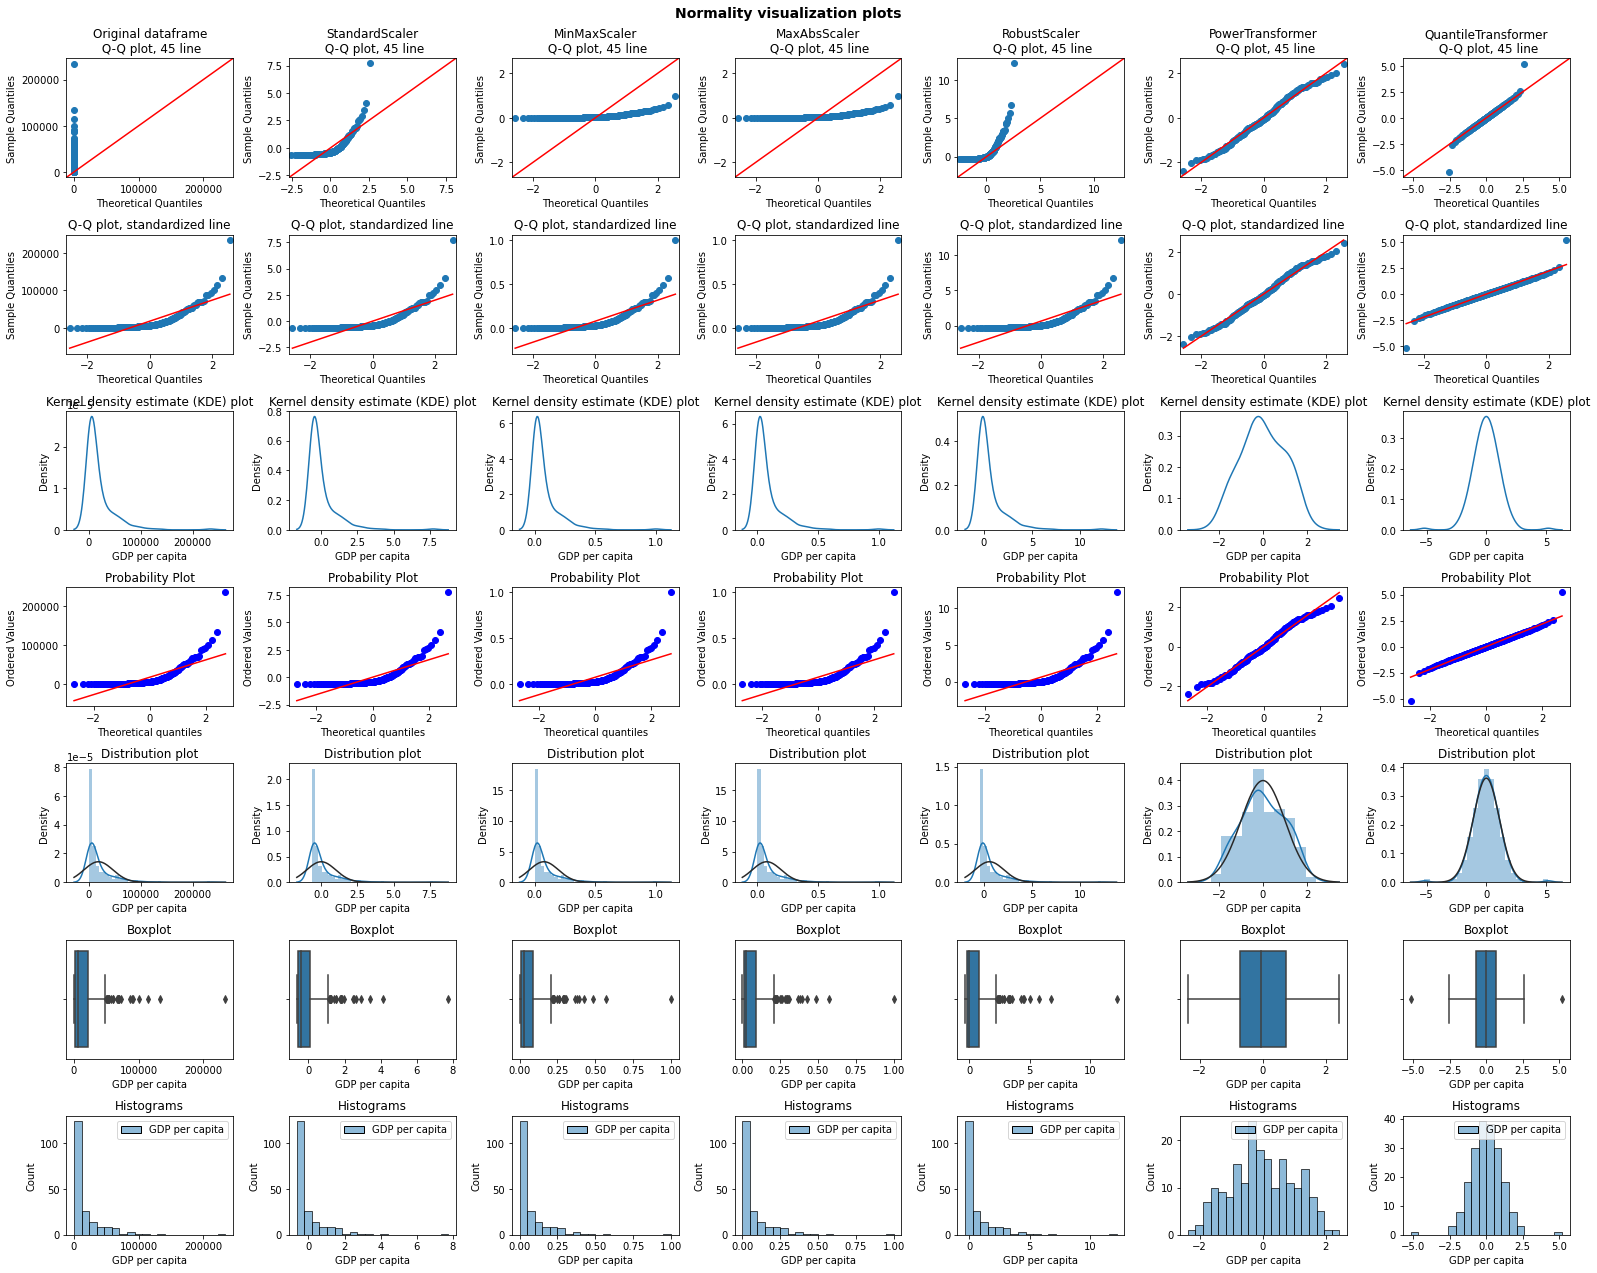

In [50]:
normality_visualization(gdp_no_missing, "GDP per capita")

<p style="color:black; background-color:white; padding:5px;">The graphs show that the scaled data from PowerTransformer and QuantileTransformer are closest to a Gaussian distribution.</p>

---

Тук да се вклюи функция за изследване на еднакост във вариациите на данните

In [24]:
name_db = "df0"
indicators = ['NY.GDP.PCAP.CD']
new_column_names = ['2020', '2021']
region = "WLD"
start_period = 2020
end_period = 2022

load_and_name_db_WB(name_db, indicators, region, start_period, end_period)

,2020,2021
economy,,
ABW,24487.86,29342.10
AFG,516.87,368.75
AGO,1603.99,1953.53
ALB,5332.16,6492.87
AND,37207.49,42137.33
...,...,...
XKX,4310.81,5269.78
YEM,NaN,NaN
ZAF,5741.64,7055.04


In [32]:
df1 = df0.dropna()
df1

,2020,2021
economy,,
ABW,24487.86,29342.10
AFG,516.87,368.75
AGO,1603.99,1953.53
ALB,5332.16,6492.87
AND,37207.49,42137.33
...,...,...
WSM,4042.75,3857.32
XKX,4310.81,5269.78
ZAF,5741.64,7055.04


In [27]:
stats.levene(df1["2020"], df1["2021"])

LeveneResult(statistic=0.6155098586596882, pvalue=0.43319460490671846)

In [35]:
df2 = df1.melt(var_name="Date", value_name="Value")
df2

,Date,Value
0,2020,24487.86
1,2020,516.87
2,2020,1603.99
3,2020,5332.16
4,2020,37207.49
...,...,...
389,2021,3857.32
390,2021,5269.78
391,2021,7055.04
392,2021,1137.34


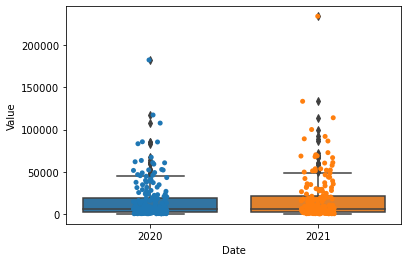

In [36]:
ax= sns.boxplot(x='Date',y='Value',data=df2)
ax = sns.stripplot(x="Date", y="Value",data=df2)